<a href="https://colab.research.google.com/github/Tudou77/DS440/blob/main/implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## load data

In [51]:
import requests
import pandas as pd
from io import StringIO
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.pyplot import figure

from sklearn.ensemble import RandomForestClassifier
url="https://drive.google.com/file/d/1gVK-eB8V7t4G6Osp90BgLTNRI5EhsI10/view?usp=sharing"

In [52]:
file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
df = pd.read_csv(csv_raw)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Team,Season,Name,DL_length,team_id,player_id,Age,W,L,ERA,...,wSL_C_pi,wXX_C_pi,O_Swing_pct_pi,Z_Swing_pct_pi,Swing_pct_pi,O_Contact_pct_pi,Z_Contact_pct_pi,Contact_pct_pi,Zone_pct_pi,Pace_pi
0,Nationals,2006,Ryan Drese,15,WAS,dresr001,30,0,2,5.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Royals,2006,Runelvys Hernandez,15,KCA,hernr003,28,6,10,6.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cubs,2006,Kerry Wood,15,CHN,woodk002,29,1,2,4.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cubs,2006,Mark Prior,15,CHN,priom001,25,1,6,7.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Phillies,2006,Chris Booker,15,PHI,bookc001,29,0,0,9.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df['DL_length'] = df['DL_length'].replace(15, 1)
df['DL_length'] = df['DL_length'].replace(60, 1)
df['DL_length'] = df['DL_length'].replace(7, 1)
df['DL_length'] = df['DL_length'].replace(10, 1)

In [54]:
df.rename(columns={'DL_length': 'injured'}, inplace=True)

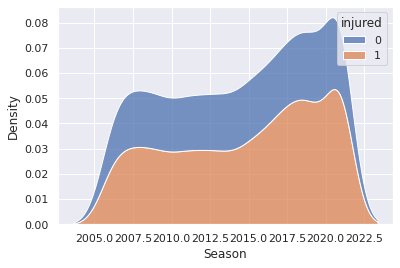

In [55]:
import seaborn as sns
sns.kdeplot(data=df, x="Season", hue="injured", multiple="stack")


##tmj


In [56]:
url3 = 'https://drive.google.com/file/d/1-FnvOuUEWBTjvw9BXw9uQs-VM8UdsMub/view?usp=sharing'
file_id = url3.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url4 = requests.get(dwn_url).text
csv_raw1 = StringIO(url4)
tmj = pd.read_csv(csv_raw1)
tmj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player           1725 non-null   object
 1   TJ Surgery Data  1725 non-null   object
dtypes: object(2)
memory usage: 27.1+ KB


In [57]:
tmj=tmj.rename(columns={"Player":"Name","TJ Surgery Data":"Season"})
tmj['Past surgery'] = "1"
tmj['Season']=tmj["Season"].str.strip().str[-4:]
tmj['Season']=tmj['Season'].astype(str).astype(int)
tmj.dtypes

Name            object
Season           int64
Past surgery    object
dtype: object

In [58]:
df['tommy_j'] = 0

In [59]:
for index, row in tmj.iterrows():
    
    player = tmj['Name'][index]
    surgery_year = tmj['Season'][index]
    player_match = df.loc[df['Name'] == player]
    matches = player_match.loc[player_match['Season'] >= surgery_year]
    
    for idx in matches.index:
        
        df['tommy_j'][idx] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [60]:
df.rename(columns={'tommy_j': 'past_surgery'}, inplace=True)
df.sample(10)


,Team,Season,Name,injured,team_id,player_id,Age,W,L,ERA,...,wXX_C_pi,O_Swing_pct_pi,Z_Swing_pct_pi,Swing_pct_pi,O_Contact_pct_pi,Z_Contact_pct_pi,Contact_pct_pi,Zone_pct_pi,Pace_pi,past_surgery
6647,0,2019,Thomas Eshelman,0,0,0,25,1,2,-0.40,...,0.00,0.241,0.664,0.468,0.721,0.903,0.860,0.537,0.0,0
3549,Dodgers,2014,Josh Beckett,1,LAN,beckj002,34,6,6,2.88,...,0.00,0.248,0.611,0.432,0.584,0.833,0.763,0.508,23.3,0
807,0,2007,Wes Littleton,0,0,0,24,3,2,4.31,...,0.00,0.245,0.588,0.440,0.593,0.845,0.785,0.569,15.8,0
2933,0,2012,Tommy Hottovy,0,0,0,30,0,0,2.89,...,0.00,0.243,0.529,0.398,0.556,0.957,0.844,0.540,21.9,1
2765,Cubs,2012,Matt Garza,1,CHN,garzm001,28,5,7,3.91,...,0.00,0.272,0.617,0.454,0.583,0.864,0.784,0.527,24.1,0
5980,0,2018,Eduardo Paredes,0,0,0,23,0,0,6.87,...,0.00,0.218,0.673,0.454,0.765,0.858,0.837,0.519,23.0,0
6273,Nationals,2019,Max Scherzer,1,WAS,schem001,34,11,7,6.50,...,0.00,0.349,0.679,0.523,0.493,0.776,0.686,0.527,0.0,0
4497,Athletics,2016,Andrew Triggs,1,OAK,triga001,27,1,1,4.31,...,-3.33,0.296,0.560,0.429,0.596,0.847,0.761,0.504,23.4,1
6694,Royals,2020,Jakob Junis,1,KCA,NaN,27,0,2,-0.20,...,0.00,0.256,0.658,0.482,0.568,0.877,0.805,0.563,0.0,0
3800,0,2014,Jim Miller,0,0,0,32,0,0,20.25,...,0.00,0.200,0.800,0.500,0.667,0.958,0.900,0.500,25.4,0


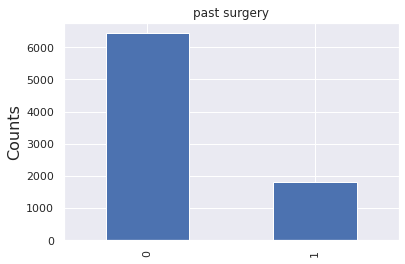

In [61]:
df.past_surgery.value_counts()
import matplotlib.pyplot as plt
past_surgery=["1","0"]
df.past_surgery.value_counts().plot(kind='bar', title='past surgery')
plt.ylabel('Counts', fontsize=16)
plt.show()

In [62]:
df.columns

Index(['Team', 'Season', 'Name', 'injured', 'team_id', 'player_id', 'Age', 'W',
       'L', 'ERA',
       ...
       'wXX_C_pi', 'O_Swing_pct_pi', 'Z_Swing_pct_pi', 'Swing_pct_pi',
       'O_Contact_pct_pi', 'Z_Contact_pct_pi', 'Contact_pct_pi', 'Zone_pct_pi',
       'Pace_pi', 'past_surgery'],
      dtype='object', length=303)

## Feature importance 

In [ ]:
df_1=df.rename(columns={"inLI":"start average LI",
                        "pos_WPA":"Win Probability Added",
                        "G":"Game played",
                        "FBv":"Fast ball velocity",
                        "Pulls":"Pull hitter",
                        "pLI":"Averge LI",
                        "vFC_pfx":"Cutter",
                        "GS":"Game started",
                        "TBF":"Total Batters Faced",
                        "K_pct":"Strikeout percentage",
                        "exLI":"exist average LI",
                        "ERA":"Earned run average",
                        "SF_pct":"sacrifice fly percentage",
                        "Contact_pct":"Contact Rate",
                        "CU_X_pi":"Curve ball index",
                        "SL_X_pfx":"Slider pfx",
                        "wCH_C_pfx":"Changeup pfx",
                        "SO":"Strikeouts counts",
                        "FA_X_pfx":"Fast ball pfx"})

In [ ]:
df_2=df_1.drop(["Name","Team","team_id","player_id","Dollars","Age_Rng"],axis=1)

In [ ]:
### select features that have high importance level 
#split dataset with train,test,validation set based on Seasons
train = df_2[df_2['Season'] <= 2019]
validation= df_2[(df_2["Season"] == 2020)]
test= df_2[df_2["Season"]==2021]
#define X and Y
X_train=train.drop(['injured',"Season"], axis = 1)
X_test=test.drop(['injured',"Season"], axis = 1)
X_vali=validation.drop(['injured',"Season"], axis = 1)
Y_train=train['injured']
Y_test=test['injured']
Y_vali=validation['injured']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_train,Y_train)
predictionforest = trainedforest.predict(X_vali)


In [ ]:
X=df_2.drop(['injured',"Season"], axis = 1)

In [ ]:
X.columns

Index(['Age', 'W', 'L', 'Earned run average', 'WAR', 'Game played',
       'Game started', 'CG', 'ShO', 'SV',
       ...
       'wXX_C_pi', 'O_Swing_pct_pi', 'Z_Swing_pct_pi', 'Swing_pct_pi',
       'O_Contact_pct_pi', 'Z_Contact_pct_pi', 'Contact_pct_pi', 'Zone_pct_pi',
       'Pace_pi', 'past_surgery'],
      dtype='object', length=295)

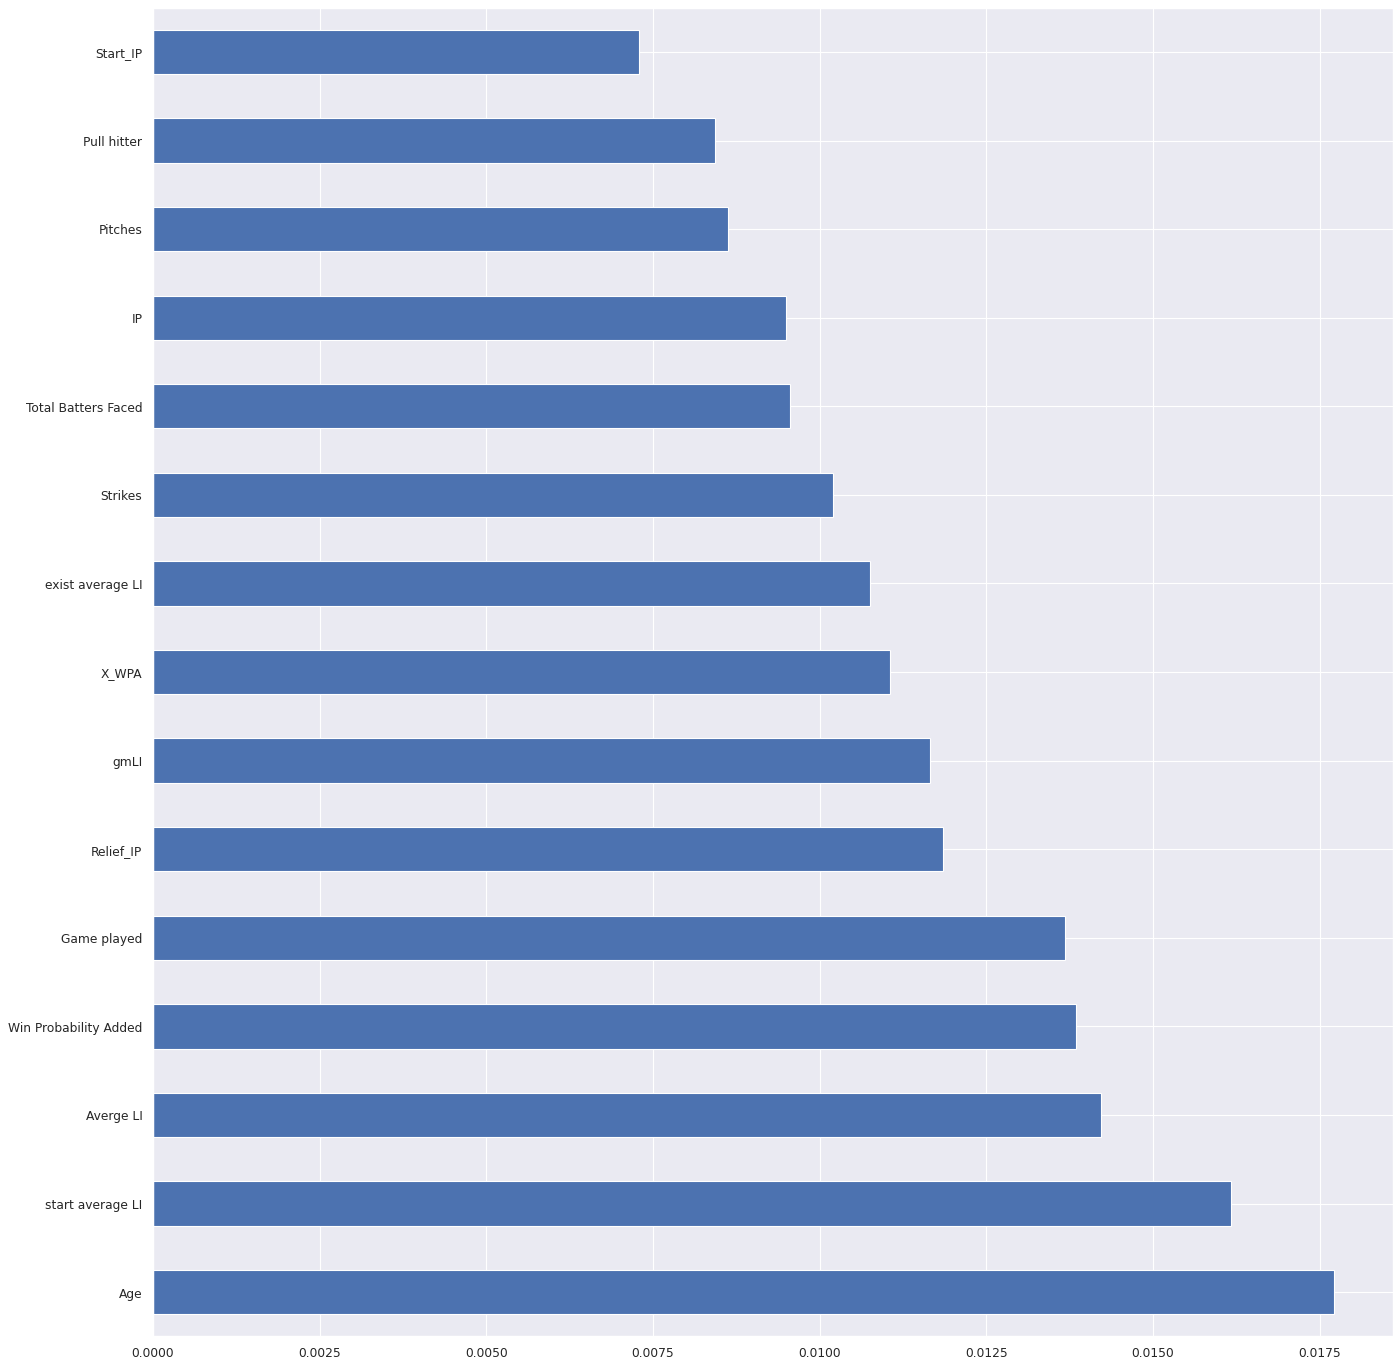

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = XGBClassifier().fit(X_train, Y_train)
predictions = xgb_model.predict(X_vali)
actuals = Y_vali

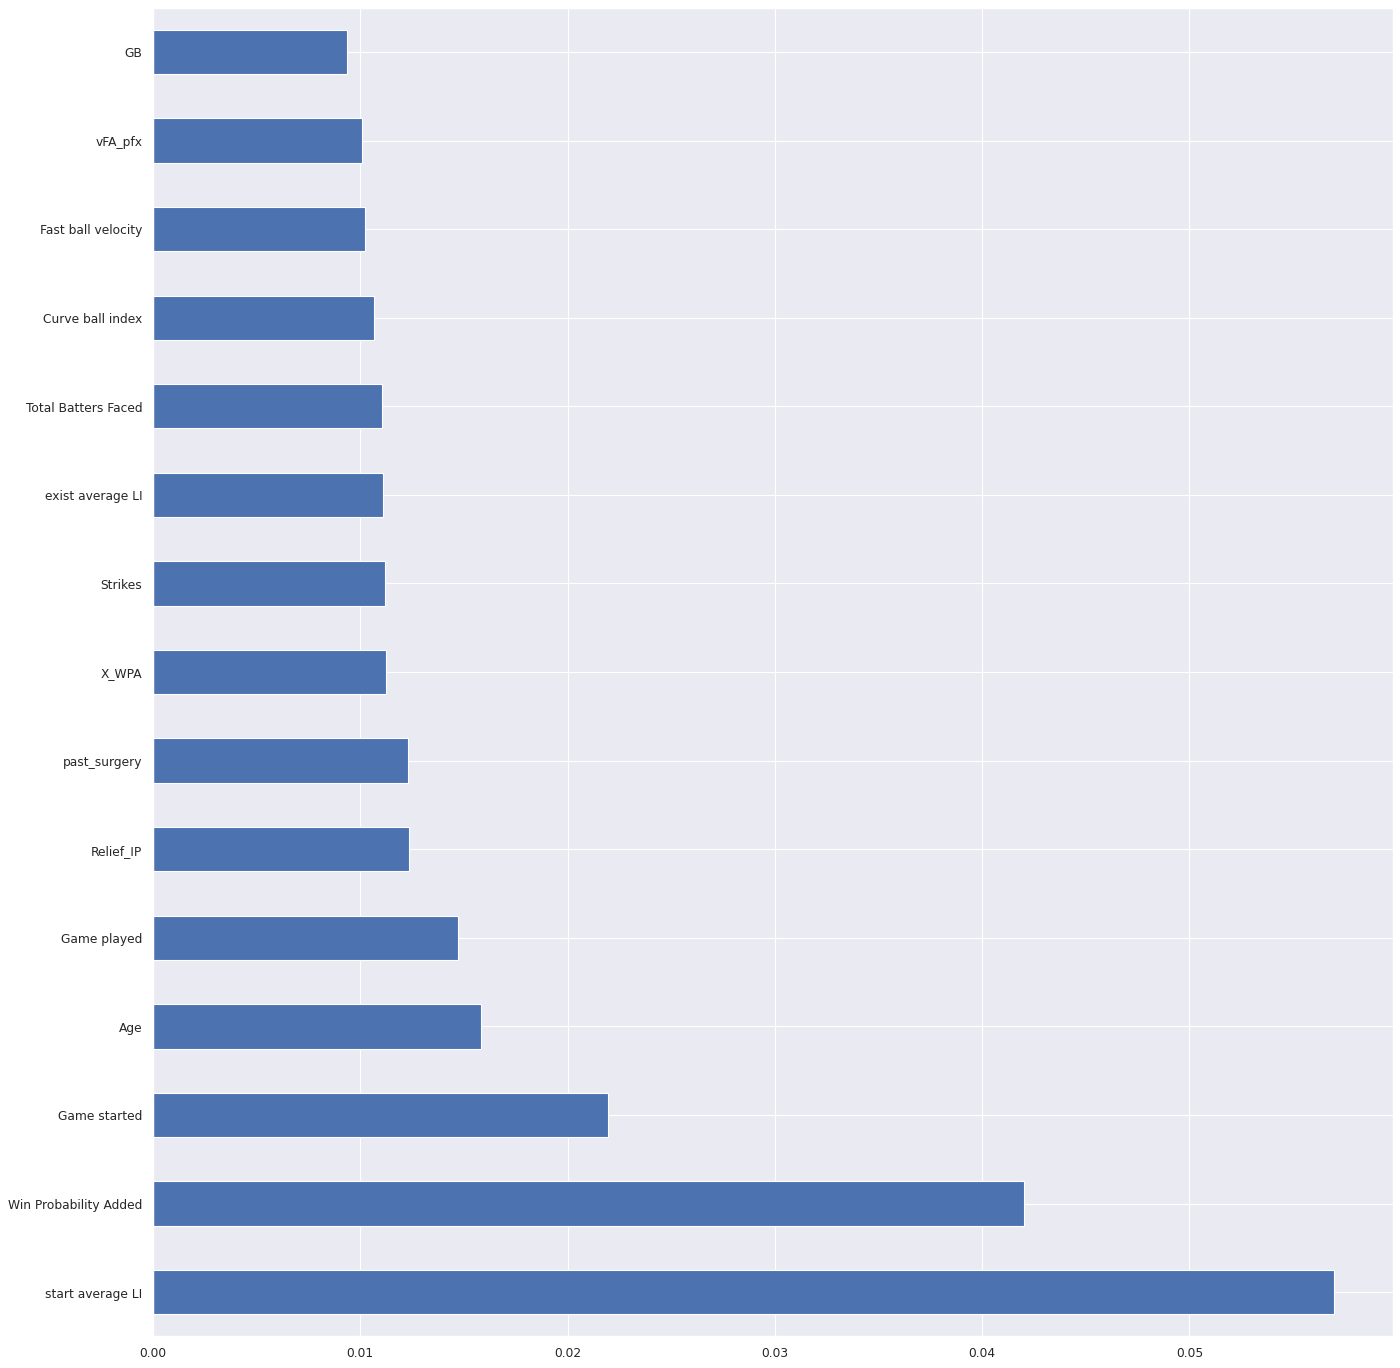

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(xgb_model.feature_importances_, index= X.columns)
feat_importances.nlargest(15).plot(kind='barh')

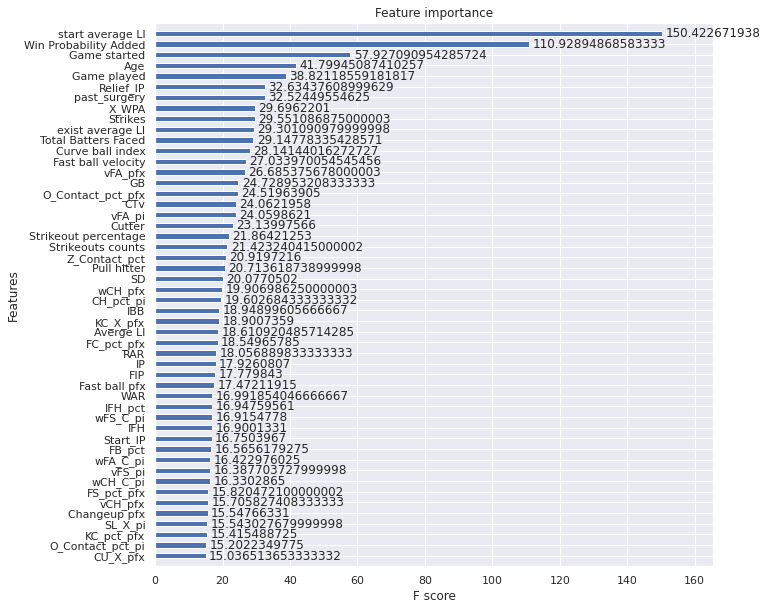

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.5, ax=ax,importance_type='gain')
plt.show()

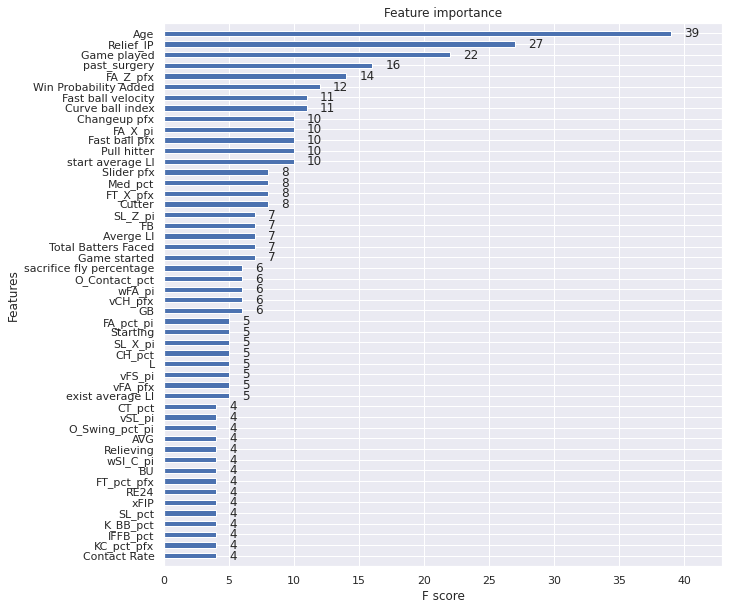

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.5, ax=ax,importance_type='weight')
plt.show()

In [ ]:
pip install shap


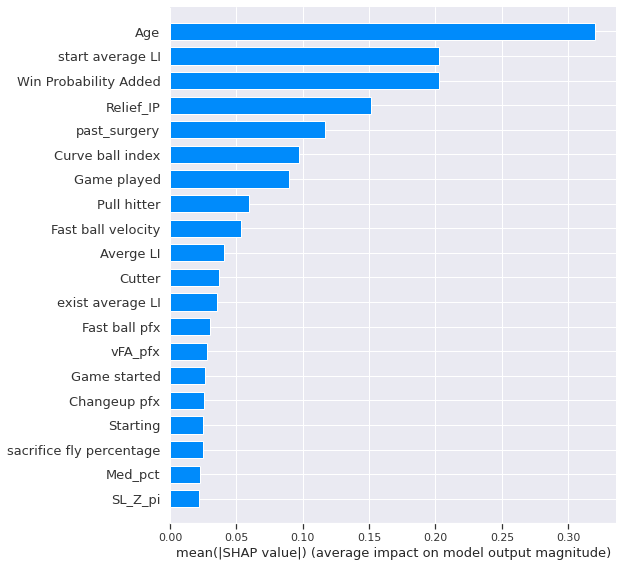

In [ ]:
import shap
shap_values = shap.TreeExplainer(xgb_model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

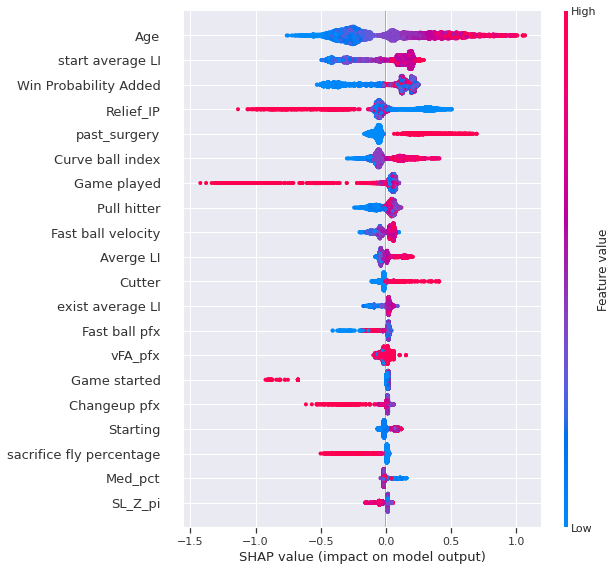

In [ ]:
shap.summary_plot(shap_values, X_train)


## feature selection 

In [63]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
df[["TBF"]] = preprocessing.StandardScaler().fit_transform(df[['TBF']].values)
df[['SO']] = preprocessing.StandardScaler().fit_transform(df[['SO']].values)

In [64]:
df1=df[["Season","injured","Age","inLI","pos_WPA","CU_X_pi","G","FBv","Pulls","pLI","vFC_pfx","GS","K_pct","exLI","wCH_C_pfx","Contact_pct","SL_X_pfx","O_Contact_pct","SF_pct","FA_X_pfx","past_surgery","ERA","TBF","SO"]]
df1=df1.rename(columns={"inLI":"start average LI","pos_WPA":"Win Probability Added","G":"Game played","FBv":"Fast ball velocity","Pulls":"Pull hitter","pLI":"Averge LI","vFC_pfx":"Cutter","GS":"Game started","TBF":"Total Batters Faced","K_pct":"Strikeout percentage","exLI":"exist average LI","ERA":"Earned run average","SF_pct":"sacrifice fly percentage","Contact_pct":"Contact Rate","CU_X_pi":"Curve ball index","SL_X_pfx":"Slider pfx","wCH_C_pfx":"Changeup pfx","SO":"Strikeouts counts","FA_X_pfx":"Fast ball pfx"})

## split

In [65]:
### select features that have high importance level 
#split dataset with train,test,validation set based on Seasons
train = df1[df1['Season'] <= 2019]
validation= df1[(df1["Season"] == 2020)]
test= df1[df1["Season"]==2021]
#define X and Y
X_train=train.drop(['injured',"Season"], axis = 1)
X_test=test.drop(['injured',"Season"], axis = 1)
X_vali=validation.drop(['injured',"Season"], axis = 1)
Y_train=train['injured']
Y_test=test['injured']
Y_vali=validation['injured']

1    3979
0    2686
Name: injured, dtype: int64

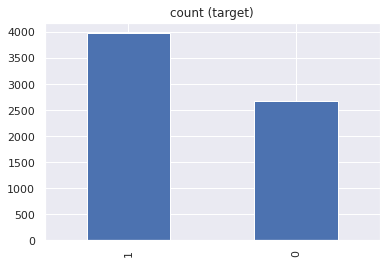

In [66]:
train.injured.value_counts().plot(kind='bar', title='count (target)')
train.injured.value_counts()

In [67]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_train, y_train = smote.fit_resample(X_train, Y_train.ravel())
print('Original dataset shape', Counter(Y_train))
print('Resample dataset shape', Counter(y_train))

Original dataset shape Counter({1: 3979, 0: 2686})
Resample dataset shape Counter({1: 3979, 0: 3979})


##model

In [68]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier()
randomforest_model.fit(x_train, y_train)

predictions = randomforest_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, randomforest_model.predict_proba(X_vali)[:, 1]))

[[131  85]
 [125 165]]
accuracy_score: 0.5849802371541502
Precision_score: 0.66
F1_score: 0.6111111111111112
Roc_acu 0.6116139846743295


In [69]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

predictions = LR_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, LR_model.predict_proba(X_vali)[:, 1]))

[[114 102]
 [ 83 207]]
accuracy_score: 0.6343873517786561
Precision_score: 0.6699029126213593
F1_score: 0.6911519198664442
Roc_acu 0.6839080459770115


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [70]:
from xgboost import XGBClassifier
import xgboost as xgb

xgb_model = XGBClassifier().fit(x_train, y_train)

predictions = xgb_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, xgb_model.predict_proba(X_vali)[:, 1]))

[[108 108]
 [ 74 216]]
accuracy_score: 0.6403162055335968
Precision_score: 0.6666666666666666
F1_score: 0.7035830618892508
Roc_acu 0.6548850574712645


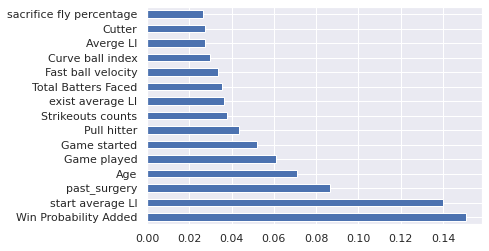

In [71]:
feat_importances = pd.Series(xgb_model.feature_importances_, index= x_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [72]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp_model = mlp.fit(x_train, y_train)
predictions = mlp_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, mlp_model.predict_proba(X_vali)[:, 1]))

[[140  76]
 [122 168]]
accuracy_score: 0.6086956521739131
Precision_score: 0.6885245901639344
F1_score: 0.6292134831460674
Roc_acu 0.6405970625798211


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC, SVC
svm=SVC(probability=True)

svm_model = svm.fit(x_train, y_train)
predictions = svm_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, svm_model.predict_proba(X_vali)[:, 1]))

[[132  84]
 [149 141]]
accuracy_score: 0.5395256916996047
Precision_score: 0.6266666666666667
F1_score: 0.5475728155339806
Roc_acu 0.6011653895274585


## ensembling

In [74]:
import pickle


In [75]:
pickle.dump(randomforest_model, open('randomforest_model.pkl', 'wb'))
pickle.dump(LR_model, open('LR_model.pkl', 'wb'))
pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))
pickle.dump(mlp_model, open('mlp_model.pkl', 'wb'))
pickle.dump(svm_model, open('svm_model.pkl', 'wb'))

In [76]:
model_names = ["randomforest_model", "LR_model", "xgb_model", "mlp_model", "svm_model"]

for model in model_names:
    with open(f"{model}.pkl", "rb") as pfile:
        exec(f"{model} = pickle.load(pfile)")

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [77]:
for model in model_names:
    curr_model = eval(model)
    print(f'{model} score: {roc_auc_score(Y_vali, curr_model.predict_proba(X_vali)[:, 1])}')

randomforest_model score: 0.6116139846743295
LR_model score: 0.6839080459770115
xgb_model score: 0.6548850574712645
mlp_model score: 0.6405970625798211
svm_model score: 0.6011653895274585


##Max voting

In [78]:
from sklearn.ensemble import VotingClassifier
voting_classifer = VotingClassifier(estimators= model_list, voting='soft', n_jobs=-1)
voting_classifer.fit(x_train, y_train)

VotingClassifier(estimators=[('randomforest_model', RandomForestClassifier()),
                             ('LR_model', LogisticRegression()),
                             ('xgb_model', XGBClassifier(missing=nan)),
                             ('mlp_model', MLPClassifier()),
                             ('svm_model', SVC(probability=True))],
                 n_jobs=-1, voting='soft')

In [79]:
y_pred = voting_classifer.predict(X_vali)
roc_auc_score(Y_vali, y_pred)

0.6012292464878671

##parameter tunning:

In [ ]:
import numpy as np 
parameters_for_testing = {
    'min_child_weight':[0.0001,0.001,0.01,0.1],
    'learning_rate':[0.00001,0.0001,0.001],
    'n_estimators':[1,2,3,5,10],
    'subsample':np.linspace(0.7,0.9,20),
    'max_depth':[2,3,4,5],
    'colsample_bytree':np.linspace(0.5,0.98,10),
}
# Parameter tuning using 7 features
xgb_model = XGBClassifier()

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, scoring='roc_auc')
gsearch1.fit(x_train,y_train)

print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

best params
{'colsample_bytree': 0.7666666666666666, 'learning_rate': 0.001, 'max_depth': 5, 'min_child_weight': 0.0001, 'n_estimators': 10, 'subsample': 0.7105263157894737}
best score
0.7608684195605886


In [ ]:
gsearch1

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'colsample_bytree': array([0.5       , 0.55333333, 0.60666667, 0.66      , 0.71333333,
       0.76666667, 0.82      , 0.87333333, 0.92666667, 0.98      ]),
                         'learning_rate': [1e-05, 0.0001, 0.001],
                         'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [0.0001, 0.001, 0.01, 0.1],
                         'n_estimators': [1, 2, 3, 5, 10],
                         'subsample': array([0.7       , 0.71052632, 0.72105263, 0.73157895, 0.74210526,
       0.75263158, 0.76315789, 0.77368421, 0.78421053, 0.79473684,
       0.80526316, 0.81578947, 0.82631579, 0.83684211, 0.84736842,
       0.85789474, 0.86842105, 0.87894737, 0.88947368, 0.9       ])},
             scoring='roc_auc')

In [ ]:
predictions=gsearch1.predict(X_test)
actuals = Y_test
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, gsearch1.predict_proba(X_test)[:, 1]))

accuracy_score: 0.6572504708097928
Precision_score: 0.7752293577981652
F1_score: 0.7358490566037736
Roc_acu 0.6906649449148387


In [ ]:
xgb_model_parameter = XGBClassifier(
        objective= 'binary:logistic',
        colsample_bytree = 0.7666666666666666,
        learning_rate = 0.001,
        max_depth = 5,
        min_child_weight = 0.0001,
        n_estimators = 10,
        subsample = 0.7105263157894737)

xgb_model_parameter.fit(x_train, y_train)

predictions = xgb_model_parameter.predict(X_test)
actuals = Y_test

print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, xgb_model_parameter.predict_proba(X_test)[:, 1]))

accuracy_score: 0.67984934086629
Precision_score: 0.7696629213483146
F1_score: 0.7632311977715877
Roc_acu 0.6836771388407598


##ROC

In [80]:
from sklearn.metrics import roc_curve

In [81]:
rfpr,rtpr, thresholds = roc_curve(Y_test, randomforest_model.predict_proba(X_test)[:,1])
lfpr,ltpr, thresholds = roc_curve(Y_test, LR_model.predict_proba(X_test)[:,1])
xfpr,xtpr, thresholds = roc_curve(Y_test, xgb_model.predict_proba(X_test)[:,1])
mfpr,mtpr, thresholds = roc_curve(Y_test, mlp_model.predict_proba(X_test)[:,1])
sfpr,stpr, thresholds = roc_curve(Y_test, svm_model.predict_proba(X_test)[:,1])
efpr,etpr, thresholds = roc_curve(Y_test, voting_classifer.predict_proba(X_test)[:,1])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

LR ROC AUC score =  0.6805612311615286
XGBoost ROC AUC score =  0.7001781686227075
RF ROC AUC score =  0.6767404132204387
SVM ROC AUC score =  0.6814725064565694
NN ROC AUC score =  0.6872057765863546
Ensembled ROC AUC score =  0.7052310471084376


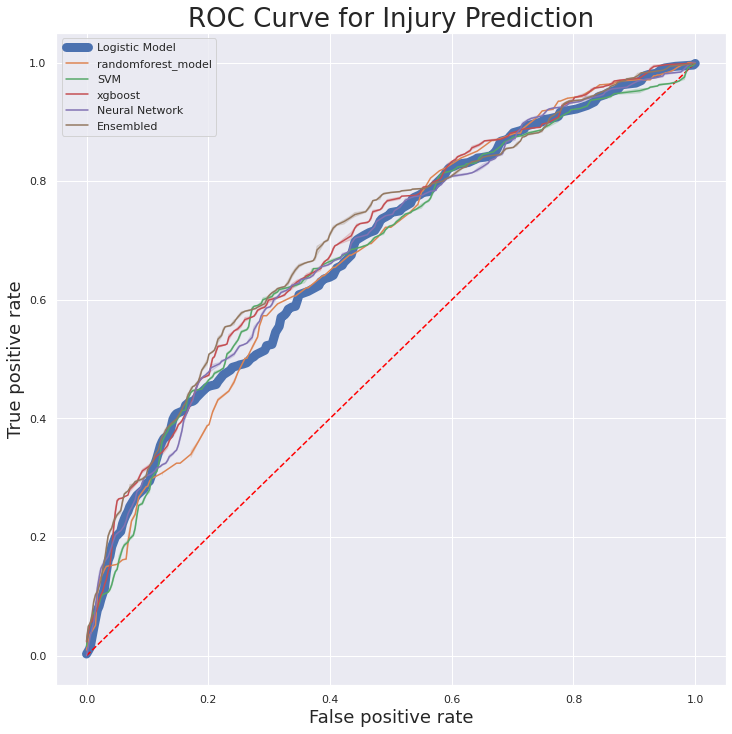

In [82]:
sns.set(rc={"lines.linewidth": 1.5})

fig, ax = plt.subplots(figsize=[12,12])


sns.lineplot(lfpr, ltpr, linewidth= 9.0, label="Logistic Model")
plt.plot([0,1],[0,1],c='red',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(rfpr, rtpr, label="randomforest_model")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(sfpr, stpr, label="SVM")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(xfpr, xtpr, label="xgboost")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(mfpr, mtpr, label="Neural Network")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

sns.lineplot(efpr, etpr, label="Ensembled")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate', fontsize=18)
plt.ylabel('True positive rate', fontsize=18)
plt.title('ROC Curve for Injury Prediction', fontsize=26);
print("LR ROC AUC score = ", roc_auc_score(Y_test, LR_model.predict_proba(X_test)[:,1]))
print("XGBoost ROC AUC score = ", roc_auc_score(Y_test, xgb_model.predict_proba(X_test)[:,1]))
print("RF ROC AUC score = ", roc_auc_score(Y_test, randomforest_model.predict_proba(X_test)[:,1]))
print("SVM ROC AUC score = ", roc_auc_score(Y_test, svm_model.predict_proba(X_test)[:,1]))
print("NN ROC AUC score = ", roc_auc_score(Y_test, mlp_model.predict_proba(X_test)[:,1]))
print("Ensembled ROC AUC score = ", roc_auc_score(Y_test, voting_classifer.predict_proba(X_test)[:,1]))


plt.savefig('ROC.jpg')